LIBS

In [44]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import pytz

GET DATA

In [45]:
with open("app/config.json", "r", encoding="utf-8") as json_file:
    config = json.load(json_file)  # Carrega o JSON como um dicionário
    file_path = config['cdr_path']

cdr_log = []
with open(file_path, "r", encoding="utf-8") as arquivo:
    for linha in arquivo:
        if linha != '\n': cdr_log.append(linha)

FileNotFoundError: [Errno 2] No such file or directory: 'dashboard_horus/data/cdr.log'

In [ ]:
cdr_log

['Call 4225,06b7a785270c0000_1,00:00:27,2024/06/26 14:26:59,2024/06/26 14:26:59,,2024/06/26 14:27:26,TerminatedBySrc,11956486412,Ext.bem_vindo.Main,10000,bem_vindo.Main,bem_vindo.Main,FailedBXferOfSrc,Ext.6412,6412,,,,,Chain: 11956486412;Ext.bem_vindo.Main;Ext.6412;\n',
 'Call 4226,e0d5b085270c0000_2,00:00:35,2024/06/26 14:36:56,2024/06/26 14:36:56,,2024/06/26 14:37:32,TerminatedBySrc,11956486412,Ext.bem_vindo.Main,10000,bem_vindo.Main,bem_vindo.Main,ReplacedDst,Ext.6412,6412,,,,,Chain: 11956486412;Ext.bem_vindo.Main;Ext.6412;\n',
 'Call 4227,e02eb285270c0000_3,00:00:05,2024/06/26 14:38:24,2024/06/26 14:38:33,,2024/06/26 14:38:38,TerminatedByDst,Ext.6412,5511956486412,6412,10000,011956486412,,5511956486412,10000,default,1,0.09,default,Chain: Ext.6412;5511956486412;\n',
 'Call 4228,bc8db485270c0000_4,00:00:04,2024/06/26 14:41:00,2024/06/26 14:41:22,,2024/06/26 14:41:27,TerminatedBySrc,Ext.6412,2149,6412,10021,7212149,,2149,10021,default,1,0.08,default,Chain: Ext.6412;2149;\n',
 'Call 42

In [ ]:
df_data = []

for line in cdr_log:
    data_features = line.split(',')
    df_data.append(data_features)

df_data

[['Call 4225',
  '06b7a785270c0000_1',
  '00:00:27',
  '2024/06/26 14:26:59',
  '2024/06/26 14:26:59',
  '',
  '2024/06/26 14:27:26',
  'TerminatedBySrc',
  '11956486412',
  'Ext.bem_vindo.Main',
  '10000',
  'bem_vindo.Main',
  'bem_vindo.Main',
  'FailedBXferOfSrc',
  'Ext.6412',
  '6412',
  '',
  '',
  '',
  '',
  'Chain: 11956486412;Ext.bem_vindo.Main;Ext.6412;\n'],
 ['Call 4226',
  'e0d5b085270c0000_2',
  '00:00:35',
  '2024/06/26 14:36:56',
  '2024/06/26 14:36:56',
  '',
  '2024/06/26 14:37:32',
  'TerminatedBySrc',
  '11956486412',
  'Ext.bem_vindo.Main',
  '10000',
  'bem_vindo.Main',
  'bem_vindo.Main',
  'ReplacedDst',
  'Ext.6412',
  '6412',
  '',
  '',
  '',
  '',
  'Chain: 11956486412;Ext.bem_vindo.Main;Ext.6412;\n'],
 ['Call 4227',
  'e02eb285270c0000_3',
  '00:00:05',
  '2024/06/26 14:38:24',
  '2024/06/26 14:38:33',
  '',
  '2024/06/26 14:38:38',
  'TerminatedByDst',
  'Ext.6412',
  '5511956486412',
  '6412',
  '10000',
  '011956486412',
  '',
  '5511956486412',
  '1000

In [ ]:
df_raw = pd.DataFrame(df_data)
df_raw

# df.to_excel('data/teste.xlsx', index=False)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,Call 4225,06b7a785270c0000_1,00:00:27,2024/06/26 14:26:59,2024/06/26 14:26:59,,2024/06/26 14:27:26,TerminatedBySrc,11956486412,Ext.bem_vindo.Main,...,bem_vindo.Main,bem_vindo.Main,FailedBXferOfSrc,Ext.6412,6412,,,,,Chain: 11956486412;Ext.bem_vindo.Main;Ext.6412;\n
1,Call 4226,e0d5b085270c0000_2,00:00:35,2024/06/26 14:36:56,2024/06/26 14:36:56,,2024/06/26 14:37:32,TerminatedBySrc,11956486412,Ext.bem_vindo.Main,...,bem_vindo.Main,bem_vindo.Main,ReplacedDst,Ext.6412,6412,,,,,Chain: 11956486412;Ext.bem_vindo.Main;Ext.6412;\n
2,Call 4227,e02eb285270c0000_3,00:00:05,2024/06/26 14:38:24,2024/06/26 14:38:33,,2024/06/26 14:38:38,TerminatedByDst,Ext.6412,5511956486412,...,10000,011956486412,,5511956486412,10000,default,1,0.09,default,Chain: Ext.6412;5511956486412;\n
3,Call 4228,bc8db485270c0000_4,00:00:04,2024/06/26 14:41:00,2024/06/26 14:41:22,,2024/06/26 14:41:27,TerminatedBySrc,Ext.6412,2149,...,10021,7212149,,2149,10021,default,1,0.08,default,Chain: Ext.6412;2149;\n
4,Call 4229,4d2f0b86270c0000_5,00:00:05,2024/06/26 16:15:37,2024/06/26 16:15:59,,2024/06/26 16:16:05,TerminatedBySrc,Ext.6412,2106,...,10021,7212106,,2106,10021,default,1,0.09,default,Chain: Ext.6412;2106;\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,Call 5452,f7f5a06c2b0c0000_79,00:02:05,2025/01/06 14:00:15,2025/01/06 14:00:15,7383;,2025/01/06 14:02:20,TerminatedByDst,11956486412,Ext.bem_vindo.Main,...,bem_vindo.Main,bem_vindo.Main,ReplacedDst,Ext.8007,8007,,,,,Chain: 11956486412;Ext.bem_vindo.Main;Ext.8007...
1228,Call 5453,bb7bbc6c2b0c0000_80,00:00:11,2025/01/06 14:30:18,2025/01/06 14:30:40,2025/01/06 14:30:52,TerminatedBySrc,Ext.6412,5511961616228,6412,...,961616228,,5511961616228,10000,Chain: Ext.6412;5511961616228;,\n,None,None,None,None
1229,Call 5454,13debd6c2b0c0000_81,00:00:04,2025/01/06 14:31:49,2025/01/06 14:31:56,2025/01/06 14:32:00,TerminatedByDst,Ext.6412,5511961616228,6412,...,5511961616228,,5511961616228,10000,Chain: Ext.6412;5511961616228;,\n,None,None,None,None
1230,Call 5455,f19cc76c2b0c0000_82,00:00:08,2025/01/06 14:42:28,2025/01/06 14:42:39,2025/01/06 14:42:47,TerminatedBySrc,Ext.6412,5511961616228,6412,...,5511961616228,,5511961616228,10000,Chain: Ext.6412;5511961616228;,,default\n,None,None,None


In [49]:
df_raw[20].to_excel('data/chain.xlsx')


In [ ]:
status = []
for sts in df_raw[15]:
    if sts == '':
        status.append('SAIDA')
        continue
    try:
        num = float(sts)  # Tenta converter para float
        if str(num).startswith('8'):
            status.append('NA')
        else:
            status.append('ATENDIDA')
    except ValueError:
        if sts == 'EndCall': status.append('ENDCALL')
        else: status.append('URA')

status

['ATENDIDA',
 'ATENDIDA',
 'ATENDIDA',
 'ATENDIDA',
 'ATENDIDA',
 'ATENDIDA',
 'ATENDIDA',
 'ATENDIDA',
 'SAIDA',
 'ATENDIDA',
 'ATENDIDA',
 'ATENDIDA',
 'ATENDIDA',
 'SAIDA',
 'ATENDIDA',
 'ATENDIDA',
 'ATENDIDA',
 'ATENDIDA',
 'ATENDIDA',
 'ATENDIDA',
 'ATENDIDA',
 'ATENDIDA',
 'ATENDIDA',
 'ENDCALL',
 'SAIDA',
 'URA',
 'ENDCALL',
 'ENDCALL',
 'URA',
 'URA',
 'URA',
 'URA',
 'URA',
 'ATENDIDA',
 'URA',
 'URA',
 'URA',
 'URA',
 'ATENDIDA',
 'ATENDIDA',
 'URA',
 'URA',
 'URA',
 'URA',
 'URA',
 'URA',
 'URA',
 'ATENDIDA',
 'URA',
 'ATENDIDA',
 'ENDCALL',
 'URA',
 'ATENDIDA',
 'URA',
 'ATENDIDA',
 'URA',
 'URA',
 'ATENDIDA',
 'SAIDA',
 'SAIDA',
 'SAIDA',
 'URA',
 'URA',
 'URA',
 'URA',
 'URA',
 'URA',
 'URA',
 'URA',
 'SAIDA',
 'URA',
 'URA',
 'URA',
 'URA',
 'URA',
 'URA',
 'URA',
 'URA',
 'URA',
 'URA',
 'URA',
 'ATENDIDA',
 'ATENDIDA',
 'ATENDIDA',
 'ATENDIDA',
 'ATENDIDA',
 'ATENDIDA',
 'ATENDIDA',
 'ATENDIDA',
 'ATENDIDA',
 'ATENDIDA',
 'ATENDIDA',
 'URA',
 'URA',
 'ATENDIDA',
 'ATE

In [ ]:
# Convertendo as strings para objetos datetime
date = pd.to_datetime(df_raw[3])

# Definindo o fuso horário original (assumido como UTC)
original_timezone = pytz.utc
br_timezone = pytz.timezone('America/Sao_Paulo')

# Atribuindo o fuso horário original (UTC) antes de ajustar para o fuso horário brasileiro
date_br = [dat.replace(tzinfo=original_timezone).astimezone(br_timezone) for dat in date]

date_br

[Timestamp('2024-06-26 11:26:59-0300', tz='America/Sao_Paulo'),
 Timestamp('2024-06-26 11:36:56-0300', tz='America/Sao_Paulo'),
 Timestamp('2024-06-26 11:38:24-0300', tz='America/Sao_Paulo'),
 Timestamp('2024-06-26 11:41:00-0300', tz='America/Sao_Paulo'),
 Timestamp('2024-06-26 13:15:37-0300', tz='America/Sao_Paulo'),
 Timestamp('2024-06-26 13:16:37-0300', tz='America/Sao_Paulo'),
 Timestamp('2024-06-26 13:17:40-0300', tz='America/Sao_Paulo'),
 Timestamp('2024-06-26 13:19:18-0300', tz='America/Sao_Paulo'),
 Timestamp('2024-06-26 15:28:24-0300', tz='America/Sao_Paulo'),
 Timestamp('2024-06-26 15:31:32-0300', tz='America/Sao_Paulo'),
 Timestamp('2024-06-26 15:35:32-0300', tz='America/Sao_Paulo'),
 Timestamp('2024-06-26 15:37:45-0300', tz='America/Sao_Paulo'),
 Timestamp('2024-06-26 16:22:12-0300', tz='America/Sao_Paulo'),
 Timestamp('2024-06-26 17:19:53-0300', tz='America/Sao_Paulo'),
 Timestamp('2024-06-26 17:24:09-0300', tz='America/Sao_Paulo'),
 Timestamp('2024-06-26 17:34:14-0300', t

In [8]:
duracao = df_raw[2].copy().replace('','NULL')
duracao[8]

'NULL'

In [9]:
terminated = df_raw[7].copy()
terminated.value_counts()

7
TerminatedBySrc     1041
TerminatedByDst      157
NoRouteExists          8
TargetNotFound         5
ServerError            5
TerminatedByRule       5
Ext.6412               4
TargetBusy             3
RouteDisabled          3
NotAvailable           1
Name: count, dtype: int64

In [10]:
df = pd.DataFrame()
df['date'] = date_br
df['duration'] = duracao
df['terminated'] = terminated
df['status'] = status
df

,date,duration,terminated,status
0,2024-06-26 11:26:59-03:00,00:00:27,TerminatedBySrc,ATENDIDA
1,2024-06-26 11:36:56-03:00,00:00:35,TerminatedBySrc,ATENDIDA
2,2024-06-26 11:38:24-03:00,00:00:05,TerminatedByDst,ATENDIDA
3,2024-06-26 11:41:00-03:00,00:00:04,TerminatedBySrc,ATENDIDA
4,2024-06-26 13:15:37-03:00,00:00:05,TerminatedBySrc,ATENDIDA
...,...,...,...,...
1227,2025-01-06 11:00:15-03:00,00:02:05,TerminatedByDst,NA
1228,2025-01-06 11:30:18-03:00,00:00:11,Ext.6412,URA
1229,2025-01-06 11:31:49-03:00,00:00:04,Ext.6412,URA
1230,2025-01-06 11:42:28-03:00,00:00:08,Ext.6412,URA


In [17]:
date_interval = ('2025-01-01', '2025-01-06')
df_interval = df[(df['date'] >= date_interval[0]) & (df['date'] <= date_interval[1])]

df_interval

,date,duration,terminated,status
1198,2025-01-02 08:19:59-03:00,00:00:02,TerminatedBySrc,URA
1199,2025-01-02 15:44:01-03:00,00:00:07,TerminatedBySrc,URA
1200,2025-01-02 17:38:17-03:00,00:00:04,TerminatedBySrc,URA
1201,2025-01-02 19:15:52-03:00,00:00:03,TerminatedBySrc,URA
1202,2025-01-03 08:15:10-03:00,00:00:03,TerminatedBySrc,URA
1203,2025-01-03 10:21:19-03:00,00:00:08,TerminatedBySrc,URA
1204,2025-01-03 11:15:46-03:00,NULL,TerminatedBySrc,SAIDA
1205,2025-01-03 11:16:38-03:00,00:00:49,TerminatedBySrc,ATENDIDA
1206,2025-01-03 14:09:53-03:00,00:00:03,TerminatedBySrc,URA
1207,2025-01-03 15:14:16-03:00,00:00:07,TerminatedBySrc,URA


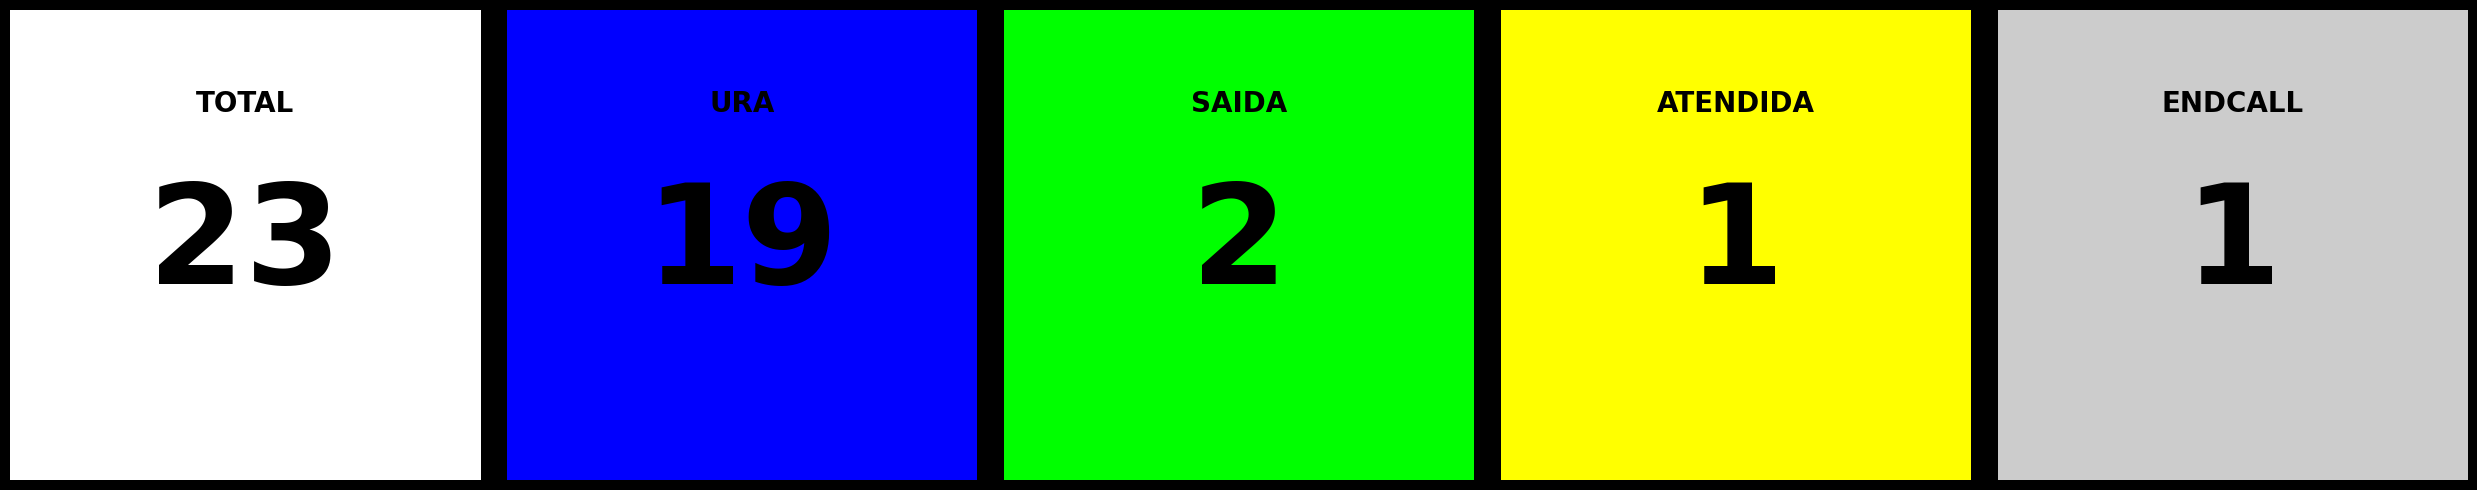

In [ ]:
data = [('TOTAL', len(df_interval['status']))] + list(df_interval['status'].value_counts().items())
# Criando um mapa de cores personalizado com cores diferentes para cada label
cmap = [
    mcolors.ListedColormap(['#ffffff']),
    mcolors.ListedColormap(['#0000ff']),
    mcolors.ListedColormap(['#00ff00']),
    mcolors.ListedColormap(['#ffff00']),
    mcolors.ListedColormap(['#cccccc']),
    mcolors.ListedColormap(['#ff0000']),
    ]
# Determinar o número de colunas e linhas (aqui estamos colocando tudo em uma única linha)
cols = len(data)
rows = 1

# Exibindo todas as imagens na mesma figura
fig, axs = plt.subplots(rows, cols, figsize=(cols * 5, 5))
fig.patch.set_facecolor('black')

# Verificando se é uma matriz ou um vetor
if cols == 1:
    axs = [axs]

for i, (label, count) in enumerate(data):
    # Exibindo a imagem com a cor especificada
    ax = axs[i]
    ax.imshow(np.ones((1, 1)), cmap=cmap[i % len(cmap)], vmin=0, vmax=1)
    ax.set_facecolor('black')
    
    # Adicionando o texto dentro do quadrado (o nome da label em cima e o número embaixo)
    ax.text(0, -0.3, label, ha='center', va='center', fontsize=20, color='black', fontweight='bold')
    ax.text(0, 0, str(count), ha='center', va='center', fontsize=100, color='black', fontweight='bold')

    # Remover os eixos
    ax.axis('off')

# Exibindo o gráfico

plt.tight_layout()
plt.show()

In [43]:
from datetime import date
str(date.today().strftime("%Y-%m-%d"))

'2025-01-06'